In [1]:
import d2d
import importlib
importlib.reload(d2d)
import numpy as np
import tensorflow as tf
import pandas as pd
import random
import os
# os.environ['TF_DETERMINISTIC_OPS'] = '1'

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [2]:
filenames = ["/home/jmanos/notebooks/Non_filtered_rhone_v2/Rhone_data_continuous_nofilt.h5", 
             "/home/jmanos/notebooks/Lowpass_data/Rhone_data_continuous_lowpass.h5", 
             "/data/fast0/datasets/Rhone_data_continuous_highpass.h5"]

filt_type = ['No_Filter', 'Lowpass', 'Highpass']

history = {}
val_performance = {}
performance = {}

for file, filt in zip(filenames, filt_type):
    print(file, filt)
    
    linear_model, lstm_model, dnn_model,  df_all_chan,  input_columns  = d2d.import_data(filename = file)
    
    da = df_all_chan.to_numpy()
    
    window_input_width = 200

    multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
        input_width=window_input_width, label_width=1, shift=0,
        label_columns=['Discharge'],
        input_columns=input_columns,
        shuffle=True)
    
    
    history['linear_'+str(window_input_width)+'_'+filt] = d2d.compile_and_fit(linear_model, multi_step_window_shuffled, learning_rate = 0.001)
    history['dnn_'+str(window_input_width)+'_'+filt] = d2d.compile_and_fit(dnn_model, multi_step_window_shuffled, learning_rate = 0.001)
    history['lstm_'+str(window_input_width)+'_'+filt] = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, learning_rate = 0.001)
    #history['conv_'+str(width)] = d2d.compile_and_fit(conv_model, multi_step_window_shuffled, learning_rate = 0.001)

    val_performance['lstm_'+str(window_input_width)+'_'+filt] = lstm_model.evaluate(multi_step_window_shuffled.val)
    performance['lstm_'+str(window_input_width)+'_'+filt] = lstm_model.evaluate(multi_step_window_shuffled.test, verbose=0)

    val_performance['linear_'+str(window_input_width)+'_'+filt] = linear_model.evaluate(multi_step_window_shuffled.val)
    performance['linear_'+str(window_input_width)+'_'+filt] = linear_model.evaluate(multi_step_window_shuffled.test, verbose=0)

    val_performance['dnn_'+str(window_input_width)+'_'+filt] = dnn_model.evaluate(multi_step_window_shuffled.val)
    performance['dnn_'+str(window_input_width)+'_'+filt] = dnn_model.evaluate(multi_step_window_shuffled.test, verbose=0)


/home/jmanos/notebooks/Non_filtered_rhone_v2/Rhone_data_continuous_nofilt.h5 No_Filter
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/100
7/7 [==============================] - 1s 80ms/step - loss: 48290.1680 - mean_absolute_error: 141.0615 - val_loss: 63996.4727 - val_mean_absolute_error: 173.5901
Epoch 2/100
7/7 [==============================] - 0s 67ms/step - loss: 67019.1172 - mean_absolute_error: 135.4799 - val_loss: 34391.4727 - val_mean_absolute_error: 125.5905
Epoch 3/100
7/7 [==============================] - 0s 67ms/step - loss: 74559.2656 - mean_absolute_error: 151.5653 - val_loss: 18953.0000 - val_mean_absolute_error: 74.2877
Epoch 4/100
7/7 [==============================] - 0s 65ms/step - loss: 22971.9258 - mean_absolute_error: 85.4668 - val_loss: 4585.1914 - val_mean_absolute_error: 52.9625
Epoch 5/100
7/7 [==============================] - 0s 65ms/step - loss: 5290.1592 - mean_absolute_error: 49.0555 - val_loss: 2408.5000 - val_mean_absolute_error: 41.

7/7 [==============================] - 0s 66ms/step - loss: 0.0062 - mean_absolute_error: 0.0360 - val_loss: 0.2269 - val_mean_absolute_error: 0.2056
Epoch 29/100
7/7 [==============================] - 0s 65ms/step - loss: 0.0054 - mean_absolute_error: 0.0332 - val_loss: 0.2264 - val_mean_absolute_error: 0.2036
Epoch 30/100
7/7 [==============================] - 0s 63ms/step - loss: 0.0048 - mean_absolute_error: 0.0303 - val_loss: 0.2256 - val_mean_absolute_error: 0.2011
Epoch 31/100
7/7 [==============================] - 0s 62ms/step - loss: 0.0043 - mean_absolute_error: 0.0282 - val_loss: 0.2251 - val_mean_absolute_error: 0.2000
Epoch 32/100
7/7 [==============================] - 0s 63ms/step - loss: 0.0038 - mean_absolute_error: 0.0261 - val_loss: 0.2245 - val_mean_absolute_error: 0.1991
Epoch 33/100
7/7 [==============================] - 0s 62ms/step - loss: 0.0034 - mean_absolute_error: 0.0246 - val_loss: 0.2244 - val_mean_absolute_error: 0.1973
Epoch 34/100
7/7 [=================

7/7 [==============================] - 1s 147ms/step - loss: 0.1501 - mean_absolute_error: 0.1856 - val_loss: 0.2691 - val_mean_absolute_error: 0.2783
Epoch 30/100
7/7 [==============================] - 1s 145ms/step - loss: 0.1420 - mean_absolute_error: 0.1793 - val_loss: 0.2542 - val_mean_absolute_error: 0.2632
Epoch 31/100
7/7 [==============================] - 1s 146ms/step - loss: 0.1382 - mean_absolute_error: 0.1752 - val_loss: 0.2598 - val_mean_absolute_error: 0.2726
Epoch 32/100
7/7 [==============================] - 1s 140ms/step - loss: 0.1449 - mean_absolute_error: 0.1779 - val_loss: 0.2719 - val_mean_absolute_error: 0.2652
Epoch 33/100
7/7 [==============================] - 1s 146ms/step - loss: 0.1185 - mean_absolute_error: 0.1580 - val_loss: 0.2713 - val_mean_absolute_error: 0.2584
Epoch 34/100
7/7 [==============================] - 1s 143ms/step - loss: 0.1134 - mean_absolute_error: 0.1502 - val_loss: 0.2698 - val_mean_absolute_error: 0.2526
Epoch 35/100
7/7 [===========

7/7 [==============================] - 0s 65ms/step - loss: 8586.2881 - mean_absolute_error: 52.0150 - val_loss: 2908.5337 - val_mean_absolute_error: 43.4880
Epoch 7/100
7/7 [==============================] - 0s 64ms/step - loss: 2916.6931 - mean_absolute_error: 42.8222 - val_loss: 423.0369 - val_mean_absolute_error: 14.5060
Epoch 8/100
7/7 [==============================] - 0s 66ms/step - loss: 1951.7931 - mean_absolute_error: 29.1446 - val_loss: 1368.0142 - val_mean_absolute_error: 28.9597
Epoch 9/100
7/7 [==============================] - 0s 66ms/step - loss: 1364.0168 - mean_absolute_error: 25.7681 - val_loss: 495.1984 - val_mean_absolute_error: 16.3640
Epoch 10/100
7/7 [==============================] - 0s 65ms/step - loss: 1214.5306 - mean_absolute_error: 23.5852 - val_loss: 1463.0709 - val_mean_absolute_error: 30.0736
Epoch 11/100
7/7 [==============================] - 0s 64ms/step - loss: 1254.6447 - mean_absolute_error: 26.5705 - val_loss: 220.4101 - val_mean_absolute_error: 9

7/7 [==============================] - 0s 64ms/step - loss: 0.0016 - mean_absolute_error: 0.0178 - val_loss: 0.4424 - val_mean_absolute_error: 0.2288
Epoch 35/100
7/7 [==============================] - 0s 64ms/step - loss: 0.0014 - mean_absolute_error: 0.0171 - val_loss: 0.4423 - val_mean_absolute_error: 0.2315
Epoch 36/100
7/7 [==============================] - 0s 64ms/step - loss: 0.0014 - mean_absolute_error: 0.0185 - val_loss: 0.4449 - val_mean_absolute_error: 0.2321
Epoch 37/100
7/7 [==============================] - 0s 64ms/step - loss: 0.0015 - mean_absolute_error: 0.0215 - val_loss: 0.4446 - val_mean_absolute_error: 0.2317
Epoch 38/100
7/7 [==============================] - 0s 65ms/step - loss: 0.0013 - mean_absolute_error: 0.0218 - val_loss: 0.4399 - val_mean_absolute_error: 0.2303
Epoch 39/100
7/7 [==============================] - 0s 63ms/step - loss: 0.0014 - mean_absolute_error: 0.0255 - val_loss: 0.4416 - val_mean_absolute_error: 0.2390
Epoch 40/100
7/7 [=================

7/7 [==============================] - 1s 146ms/step - loss: 0.0967 - mean_absolute_error: 0.1567 - val_loss: 0.3115 - val_mean_absolute_error: 0.2749
Epoch 33/100
7/7 [==============================] - 1s 140ms/step - loss: 0.0911 - mean_absolute_error: 0.1483 - val_loss: 0.3029 - val_mean_absolute_error: 0.2710
Epoch 34/100
7/7 [==============================] - 1s 139ms/step - loss: 0.0871 - mean_absolute_error: 0.1425 - val_loss: 0.2954 - val_mean_absolute_error: 0.2644
Epoch 35/100
7/7 [==============================] - 1s 137ms/step - loss: 0.0859 - mean_absolute_error: 0.1427 - val_loss: 0.2874 - val_mean_absolute_error: 0.2574
Epoch 36/100
7/7 [==============================] - 1s 147ms/step - loss: 0.0826 - mean_absolute_error: 0.1378 - val_loss: 0.2848 - val_mean_absolute_error: 0.2519
Epoch 37/100
7/7 [==============================] - 1s 140ms/step - loss: 0.0794 - mean_absolute_error: 0.1310 - val_loss: 0.2805 - val_mean_absolute_error: 0.2499
Epoch 38/100
7/7 [===========

7/7 [==============================] - 0s 68ms/step - loss: 143314.4844 - mean_absolute_error: 219.7953 - val_loss: 106868.7344 - val_mean_absolute_error: 250.5955
Epoch 1/100
7/7 [==============================] - 1s 69ms/step - loss: 21.2426 - mean_absolute_error: 2.8605 - val_loss: 19.5779 - val_mean_absolute_error: 2.6853
Epoch 2/100
7/7 [==============================] - 0s 63ms/step - loss: 13.2451 - mean_absolute_error: 1.9813 - val_loss: 8.0645 - val_mean_absolute_error: 2.1043
Epoch 3/100
7/7 [==============================] - 0s 63ms/step - loss: 7.9246 - mean_absolute_error: 2.0019 - val_loss: 7.0347 - val_mean_absolute_error: 2.2182
Epoch 4/100
7/7 [==============================] - 0s 61ms/step - loss: 4.6035 - mean_absolute_error: 1.6624 - val_loss: 5.6364 - val_mean_absolute_error: 2.0235
Epoch 5/100
7/7 [==============================] - 0s 61ms/step - loss: 6.7675 - mean_absolute_error: 2.1325 - val_loss: 2.3185 - val_mean_absolute_error: 1.0985
Epoch 6/100
7/7 [======

7/7 [==============================] - 1s 141ms/step - loss: 2.2417 - mean_absolute_error: 1.1020 - val_loss: 1.5604 - val_mean_absolute_error: 0.9501
Epoch 3/100
7/7 [==============================] - 1s 138ms/step - loss: 1.6930 - mean_absolute_error: 0.9490 - val_loss: 1.1869 - val_mean_absolute_error: 0.7896
Epoch 4/100
7/7 [==============================] - 1s 138ms/step - loss: 1.2539 - mean_absolute_error: 0.7965 - val_loss: 1.0324 - val_mean_absolute_error: 0.7199
Epoch 5/100
7/7 [==============================] - 1s 140ms/step - loss: 1.0614 - mean_absolute_error: 0.7295 - val_loss: 0.9001 - val_mean_absolute_error: 0.6632
Epoch 6/100
7/7 [==============================] - 1s 135ms/step - loss: 0.9027 - mean_absolute_error: 0.6532 - val_loss: 0.8430 - val_mean_absolute_error: 0.6397
Epoch 7/100
7/7 [==============================] - 1s 135ms/step - loss: 0.8448 - mean_absolute_error: 0.6285 - val_loss: 0.7976 - val_mean_absolute_error: 0.6183
Epoch 8/100
7/7 [=================

7/7 [==============================] - 1s 148ms/step - loss: 0.1883 - mean_absolute_error: 0.1633 - val_loss: 0.1719 - val_mean_absolute_error: 0.2128
Epoch 53/100
7/7 [==============================] - 1s 141ms/step - loss: 0.1820 - mean_absolute_error: 0.1766 - val_loss: 0.1662 - val_mean_absolute_error: 0.2065
Epoch 54/100
7/7 [==============================] - 1s 144ms/step - loss: 0.1837 - mean_absolute_error: 0.1750 - val_loss: 0.1874 - val_mean_absolute_error: 0.2608
Epoch 55/100
7/7 [==============================] - 1s 145ms/step - loss: 0.1862 - mean_absolute_error: 0.1978 - val_loss: 0.1749 - val_mean_absolute_error: 0.2477
Epoch 56/100
7/7 [==============================] - 1s 141ms/step - loss: 0.1893 - mean_absolute_error: 0.2223 - val_loss: 0.2109 - val_mean_absolute_error: 0.2693
Epoch 57/100
7/7 [==============================] - 1s 137ms/step - loss: 0.1937 - mean_absolute_error: 0.2301 - val_loss: 0.1808 - val_mean_absolute_error: 0.2432
Epoch 58/100
7/7 [===========

<IPython.core.display.Javascript object>


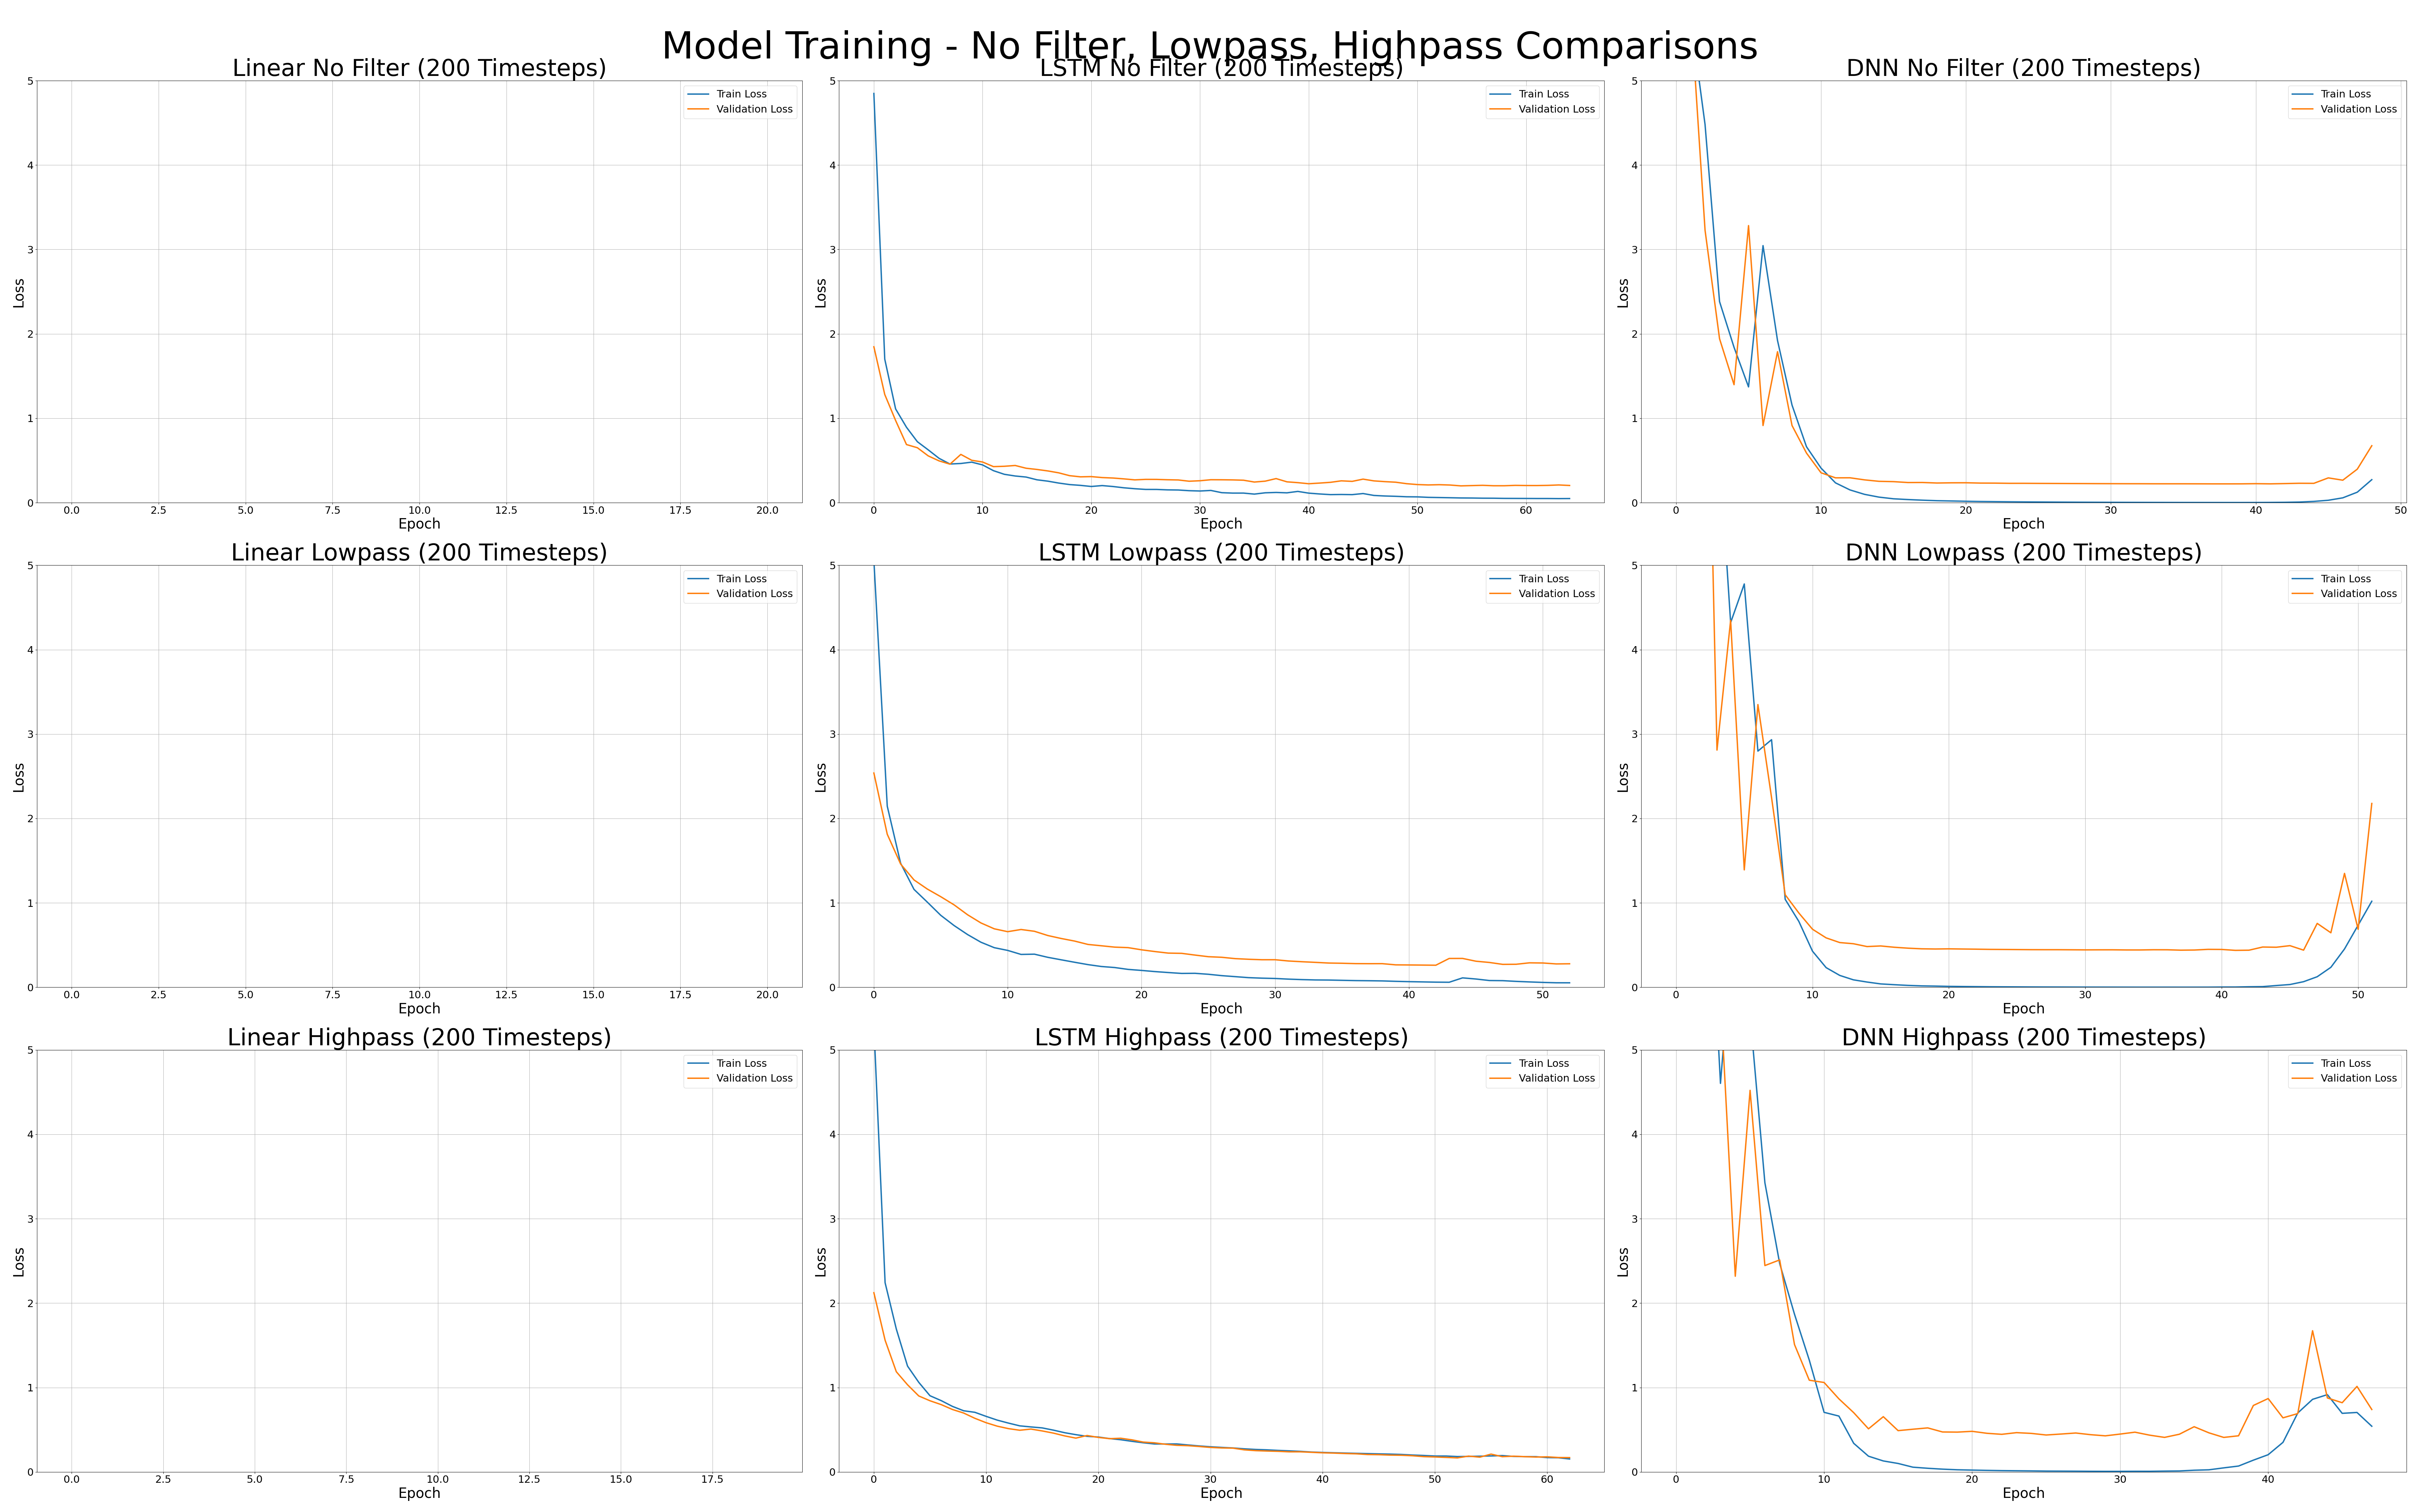

In [4]:

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 22})

fig, ((ax0,ax1,ax2), (ax3,ax4,ax5), (ax6,ax7,ax8)) = plt.subplots(nrows=3, 
                                 ncols=3, 
                                 sharey=False, 
                                 sharex=False,
                                 figsize=(72,45))
fig.patch.set_facecolor('white')

for ax, hist, title in zip((ax0,ax1,ax2), 
                           ('linear_200_No_Filter','lstm_200_No_Filter','dnn_200_No_Filter'),
                            ('Linear No Filter (200 Timesteps)','LSTM No Filter (200 Timesteps)','DNN No Filter (200 Timesteps)')):
    ax.plot(history[hist].history['loss'], label='Train Loss',linewidth=3)
    ax.plot(history[hist].history['val_loss'], label='Validation Loss',linewidth=3)
    ax.grid(True)
    ax.legend()
    ax.set_title(title,size=50)
    ax.set_ylabel('Loss', size=30)
    ax.set_xlabel('Epoch', size=30)
    ax.set_ylim((0, 5))
    
for ax, hist, title in zip((ax3,ax4,ax5), 
                           ('linear_200_Lowpass','lstm_200_Lowpass','dnn_200_Lowpass'),
                       ('Linear Lowpass (200 Timesteps)','LSTM Lowpass (200 Timesteps)','DNN Lowpass (200 Timesteps)')):
    ax.plot(history[hist].history['loss'], label='Train Loss',linewidth=3)
    ax.plot(history[hist].history['val_loss'], label='Validation Loss',linewidth=3)
    ax.grid(True)
    ax.legend()
    ax.set_title(title,size=50)
    ax.set_ylabel('Loss', size=30)
    ax.set_xlabel('Epoch', size=30)
    ax.set_ylim((0, 5))
    
for ax, hist, title in zip((ax6,ax7,ax8), 
                           ('linear_200_Highpass','lstm_200_Highpass','dnn_200_Highpass'),
                       ('Linear Highpass (200 Timesteps)','LSTM Highpass (200 Timesteps)','DNN Highpass (200 Timesteps)')):
    ax.plot(history[hist].history['loss'], label='Train Loss',linewidth=3)
    ax.plot(history[hist].history['val_loss'], label='Validation Loss',linewidth=3)
    ax.grid(True)
    ax.legend()
    ax.set_title(title,size=50)
    ax.set_ylabel('Loss', size=30)
    ax.set_xlabel('Epoch', size=30)
    ax.set_ylim((0, 5))
    
fig.suptitle('Model Training - No Filter, Lowpass, Highpass Comparisons', fontsize = 80)

plt.tight_layout()
plt.show()